# Setup

bathymetry: https://www.fatiando.org/harmonica/dev/sample_data/earth_topography.html

In [1]:
# add in the sla and chl observation lines 

# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
# ds_WOD

In [4]:
ds_HE = xr.open_dataset('../data/breitburg_processed.nc')
# ds_HE

In [5]:
ds_mask = xr.open_dataset('../data/coastal_mask.nc')

In [6]:
lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
mask_wAS = ds_mask.maskn.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
xx_wAS,yy_wAS = np.meshgrid(mask_wAS.lon,mask_wAS.lat)
mask_wAS = mask_wAS.where(~((yy_wAS>22) & (yy_wAS<32) & (xx_wAS>45) & (xx_wAS<57.5)))
xx_wAS[np.isnan(mask_wAS)] = np.nan
yy_wAS[np.isnan(mask_wAS)] = np.nan
xx_wAS = xx_wAS.flatten()
yy_wAS = yy_wAS.flatten()

lat_slice_eAS = slice(bounds_eAS[2],bounds_eAS[3]) 
lon_slice_eAS = slice(bounds_eAS[0],bounds_eAS[1]) 
lat_slice_eAS_SL = slice(bounds_eAS_SL[2],bounds_eAS_SL[3]) 
lon_slice_eAS_SL = slice(bounds_eAS_SL[0],bounds_eAS_SL[1]) 

#subset gridded data
mask_eAS = ds_mask.maskw_ro.sel(lat_ro = lat_slice_eAS, lon_ro = lon_slice_eAS)
xx_eAS,yy_eAS = np.meshgrid(mask_eAS.lon_ro,mask_eAS.lat_ro)
xx_eAS[mask_eAS == 0] = np.nan
yy_eAS[mask_eAS == 0] = np.nan
xx_eAS = xx_eAS.flatten()
yy_eAS = yy_eAS.flatten()

mask_eAS_SL = ds_mask.maskw_ro.sel(lat_ro = lat_slice_eAS_SL, lon_ro = lon_slice_eAS_SL)
xx_eAS_SL,yy_eAS_SL = np.meshgrid(mask_eAS_SL.lon_ro,mask_eAS_SL.lat_ro)
xx_eAS_SL[np.array(mask_eAS_SL) == 0] = np.nan
yy_eAS_SL[np.array(mask_eAS_SL) == 0] = np.nan
xx_eAS_SL = xx_eAS_SL.flatten()
yy_eAS_SL = yy_eAS_SL.flatten()

xx_eAS = np.concatenate((xx_eAS,xx_eAS_SL),0)
yy_eAS = np.concatenate((yy_eAS,yy_eAS_SL),0)

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3]) 
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1]) 
lat_slice_wBoB_SL = slice(bounds_wBoB_SL[2],bounds_wBoB_SL[3])
lon_slice_wBoB_SL = slice(bounds_wBoB_SL[0],bounds_wBoB_SL[1])

#subset gridded data
mask_wBoB = ds_mask.maskn.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
xx_wBoB,yy_wBoB = np.meshgrid(mask_wBoB.lon,mask_wBoB.lat)
xx_wBoB[np.isnan(mask_wBoB)] = np.nan
yy_wBoB[np.isnan(mask_wBoB)] = np.nan
xx_wBoB = xx_wBoB.flatten()
yy_wBoB = yy_wBoB.flatten()

mask_wBoB_SL = ds_mask.maskn.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
xx_wBoB_SL,yy_wBoB_SL = np.meshgrid(mask_wBoB_SL.lon,mask_wBoB_SL.lat)
xx_wBoB_SL[np.isnan(np.array(mask_wBoB_SL))] = np.nan
yy_wBoB_SL[np.isnan(np.array(mask_wBoB_SL))] = np.nan
xx_wBoB_SL = xx_wBoB_SL.flatten()
yy_wBoB_SL = yy_wBoB_SL.flatten()

xx_wBoB = np.concatenate((xx_wBoB,xx_wBoB_SL),0)
yy_wBoB = np.concatenate((yy_wBoB,yy_wBoB_SL),0)

lat_slice_eBoB = slice(bounds_eBoB[2],bounds_eBoB[3]) 
lon_slice_eBoB = slice(bounds_eBoB[0],bounds_eBoB[1]) 

#subset gridded data
mask_eBoB = ds_mask.maskw_ro.sel(lat_ro = lat_slice_eBoB, lon_ro = lon_slice_eBoB)
xx_eBoB,yy_eBoB = np.meshgrid(mask_eBoB.lon_ro,mask_eBoB.lat_ro)
mask_eBoB = mask_eBoB.where(~((yy_eBoB>6) & (yy_eBoB<15) & (xx_eBoB>100) & (xx_eBoB<110)),0)
mask_eBoB = mask_eBoB.where(~((yy_eBoB>8) & (yy_eBoB<15) & (xx_eBoB>99) & (xx_eBoB<110)),0)
xx_eBoB[mask_eBoB==0] = np.nan
yy_eBoB[mask_eBoB==0] = np.nan
xx_eBoB = xx_eBoB.flatten()
yy_eBoB = yy_eBoB.flatten()





# WOD

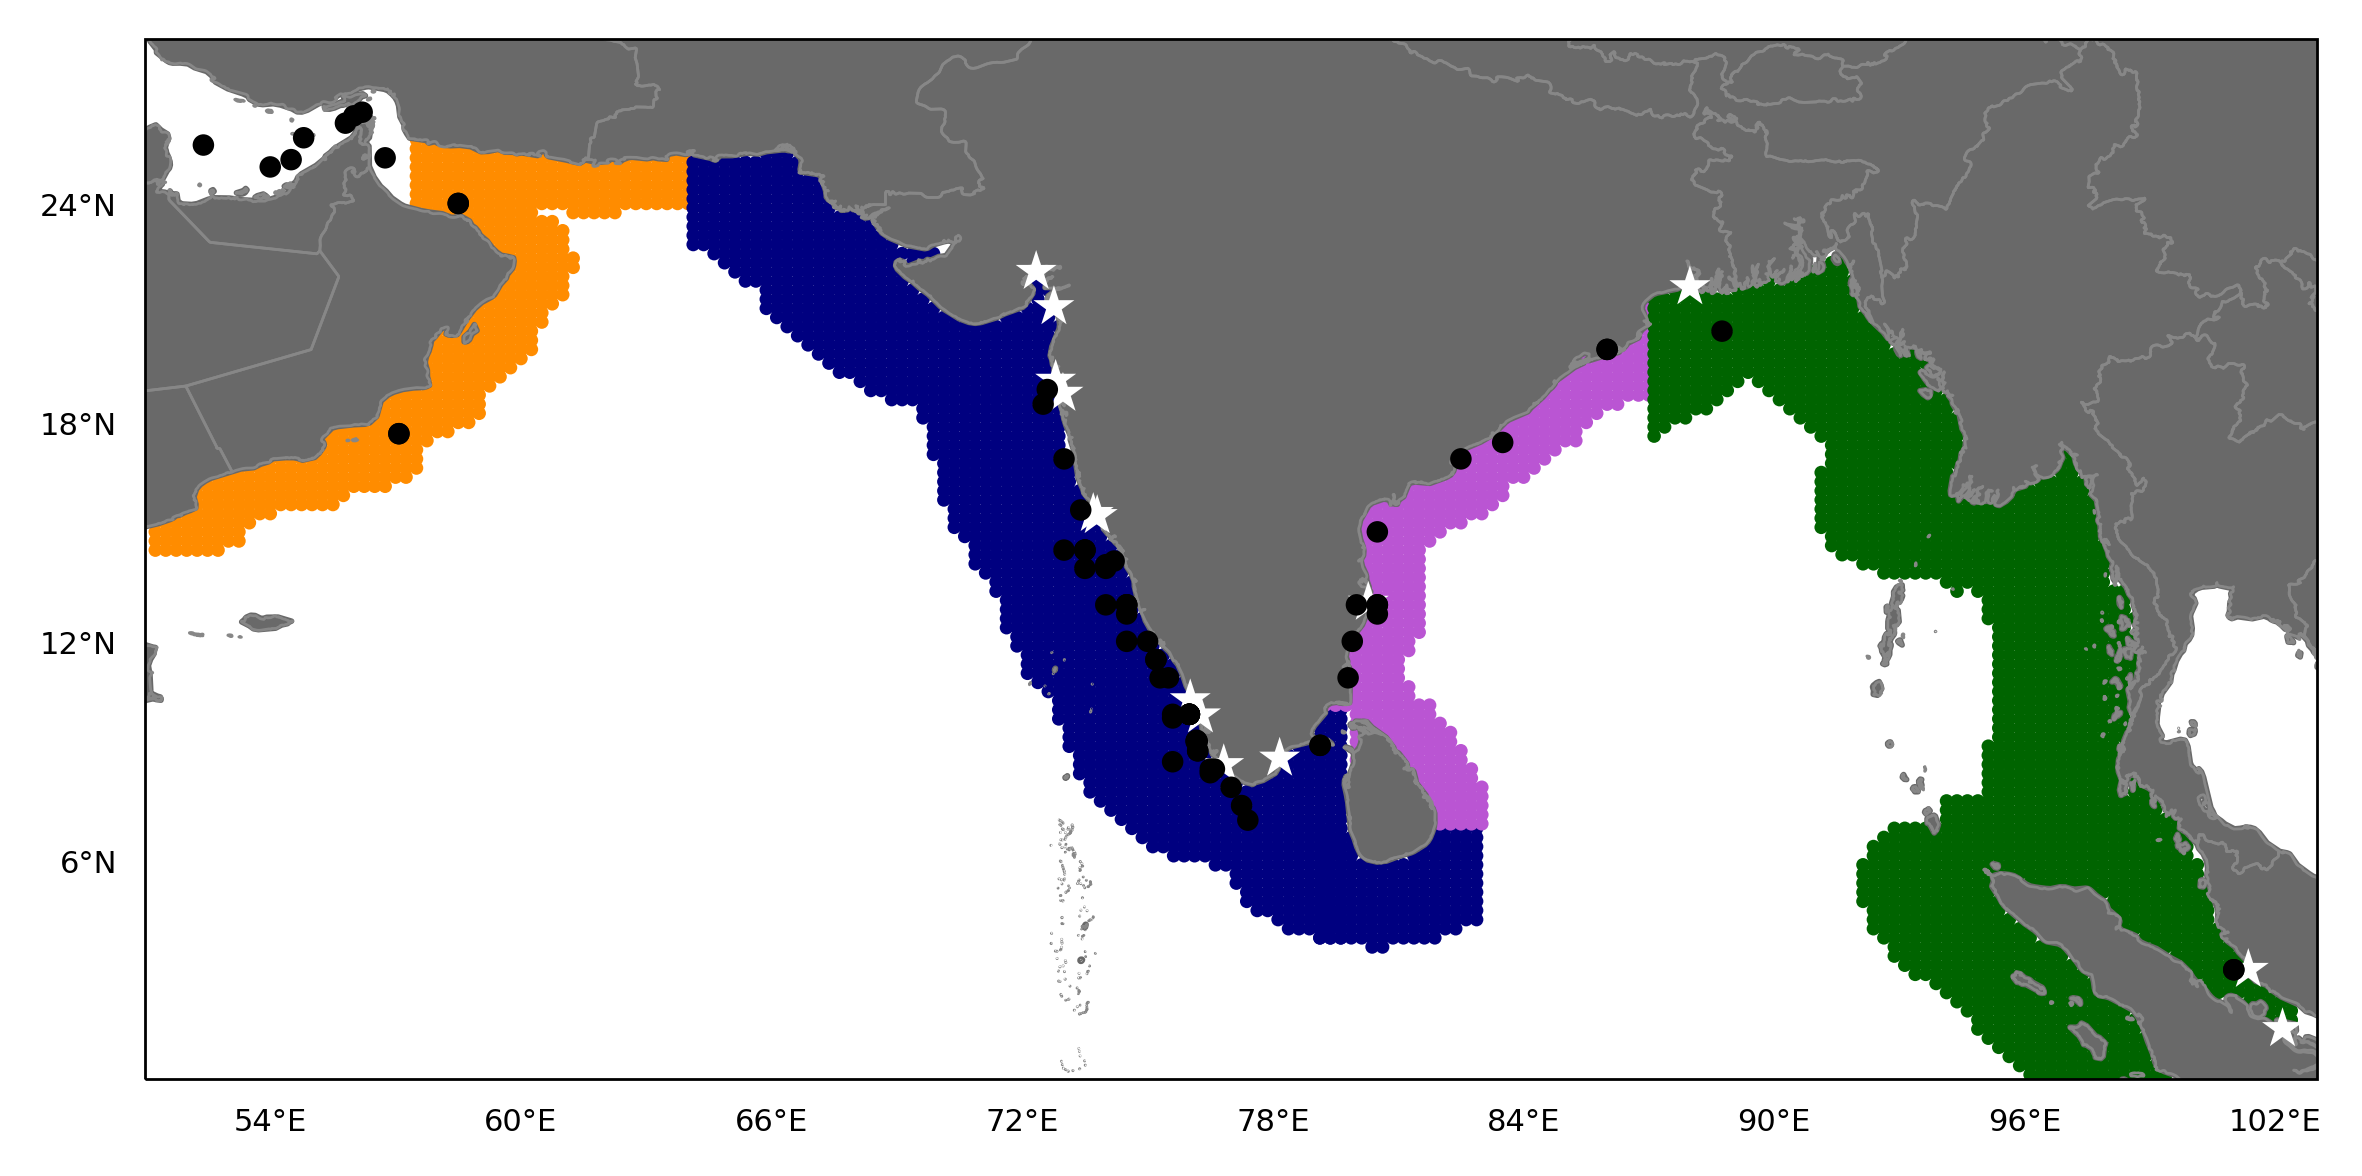

In [7]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 12,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':5.5,
         'axes.linewidth':0.35}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,103,0,28.5]
cmin = 20
cmax = 160
sz = 24
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['darkorange','navy','mediumorchid','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,4),dpi=400)

#############################################################
#----------------- Temperature ---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.28, top = 0.93)
# add_bathy(ax,cbounds)

# wAS

p = ax.scatter(xx_wAS,yy_wAS,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eAS

p = ax.scatter(xx_eAS,yy_eAS,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# wBoB
p = ax.scatter(xx_wBoB,yy_wBoB,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eBoB
p = ax.scatter(xx_eBoB,yy_eBoB,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False)
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
# g.ylabels_left = False
# g.xlabels_bottom = False
g.xlabel_style = {'size': 5.5}
g.ylabel_style = {'size': 5.5}
# g.xlocator = mticker.FixedLocator([54,78,102])


# ax.set_title('Risk of Hypoxia')


newlat = [25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,11.5,10,8,11,12,13,13,13,20,20,17,12.75, 20.5,3,
         3,24,24,17.45,25,25.2,25.8,26.2,26.4,26.5,25.25,9.15,9.15,15, 10,10,11.5,10,
         7.5,8.5,9,10,11,12,12.75,14,9,8.5,7.1,8.4,8.7,9.9,11,12,13,14,14.5,10,14.5,14.5,14.5,
         10,14.2,13,18.5,9.26,9.29,9.26,9.26]
newlon = [52.4,57.08,57.08,74.5,76,72.6,73,73.4,74,74.5,75.2,76,77,79.8,79.9,80,80.5,80.5,86,86,82.5,80.5,88.75,101,
         101,58.5,58.5,83.5,54,54.5,54.8,55.8,56,56.2,56.75,79.125,79.135,80.5,76,76,75.2,75.6,
         77.25,76.5,76.2,76,75.5,75,74.5,74,76.2,76.6,77.4,76.5,75.6,75.6,75.3,74.5,74,73.5,73,76,73.5,
         73.5,73.5,76,74.2,74.5,72.5,76.17,76.17,76.19,76.16]


####### Hypoxia ##############################################
ind = ds_HE.etype == 1
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=60,marker = '*',c='w',alpha = 1,
           edgecolor = 'none',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

ax.scatter(newlon,newlat,s=60,marker = '.',c='k',alpha = 1,
           edgecolor = 'none',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 

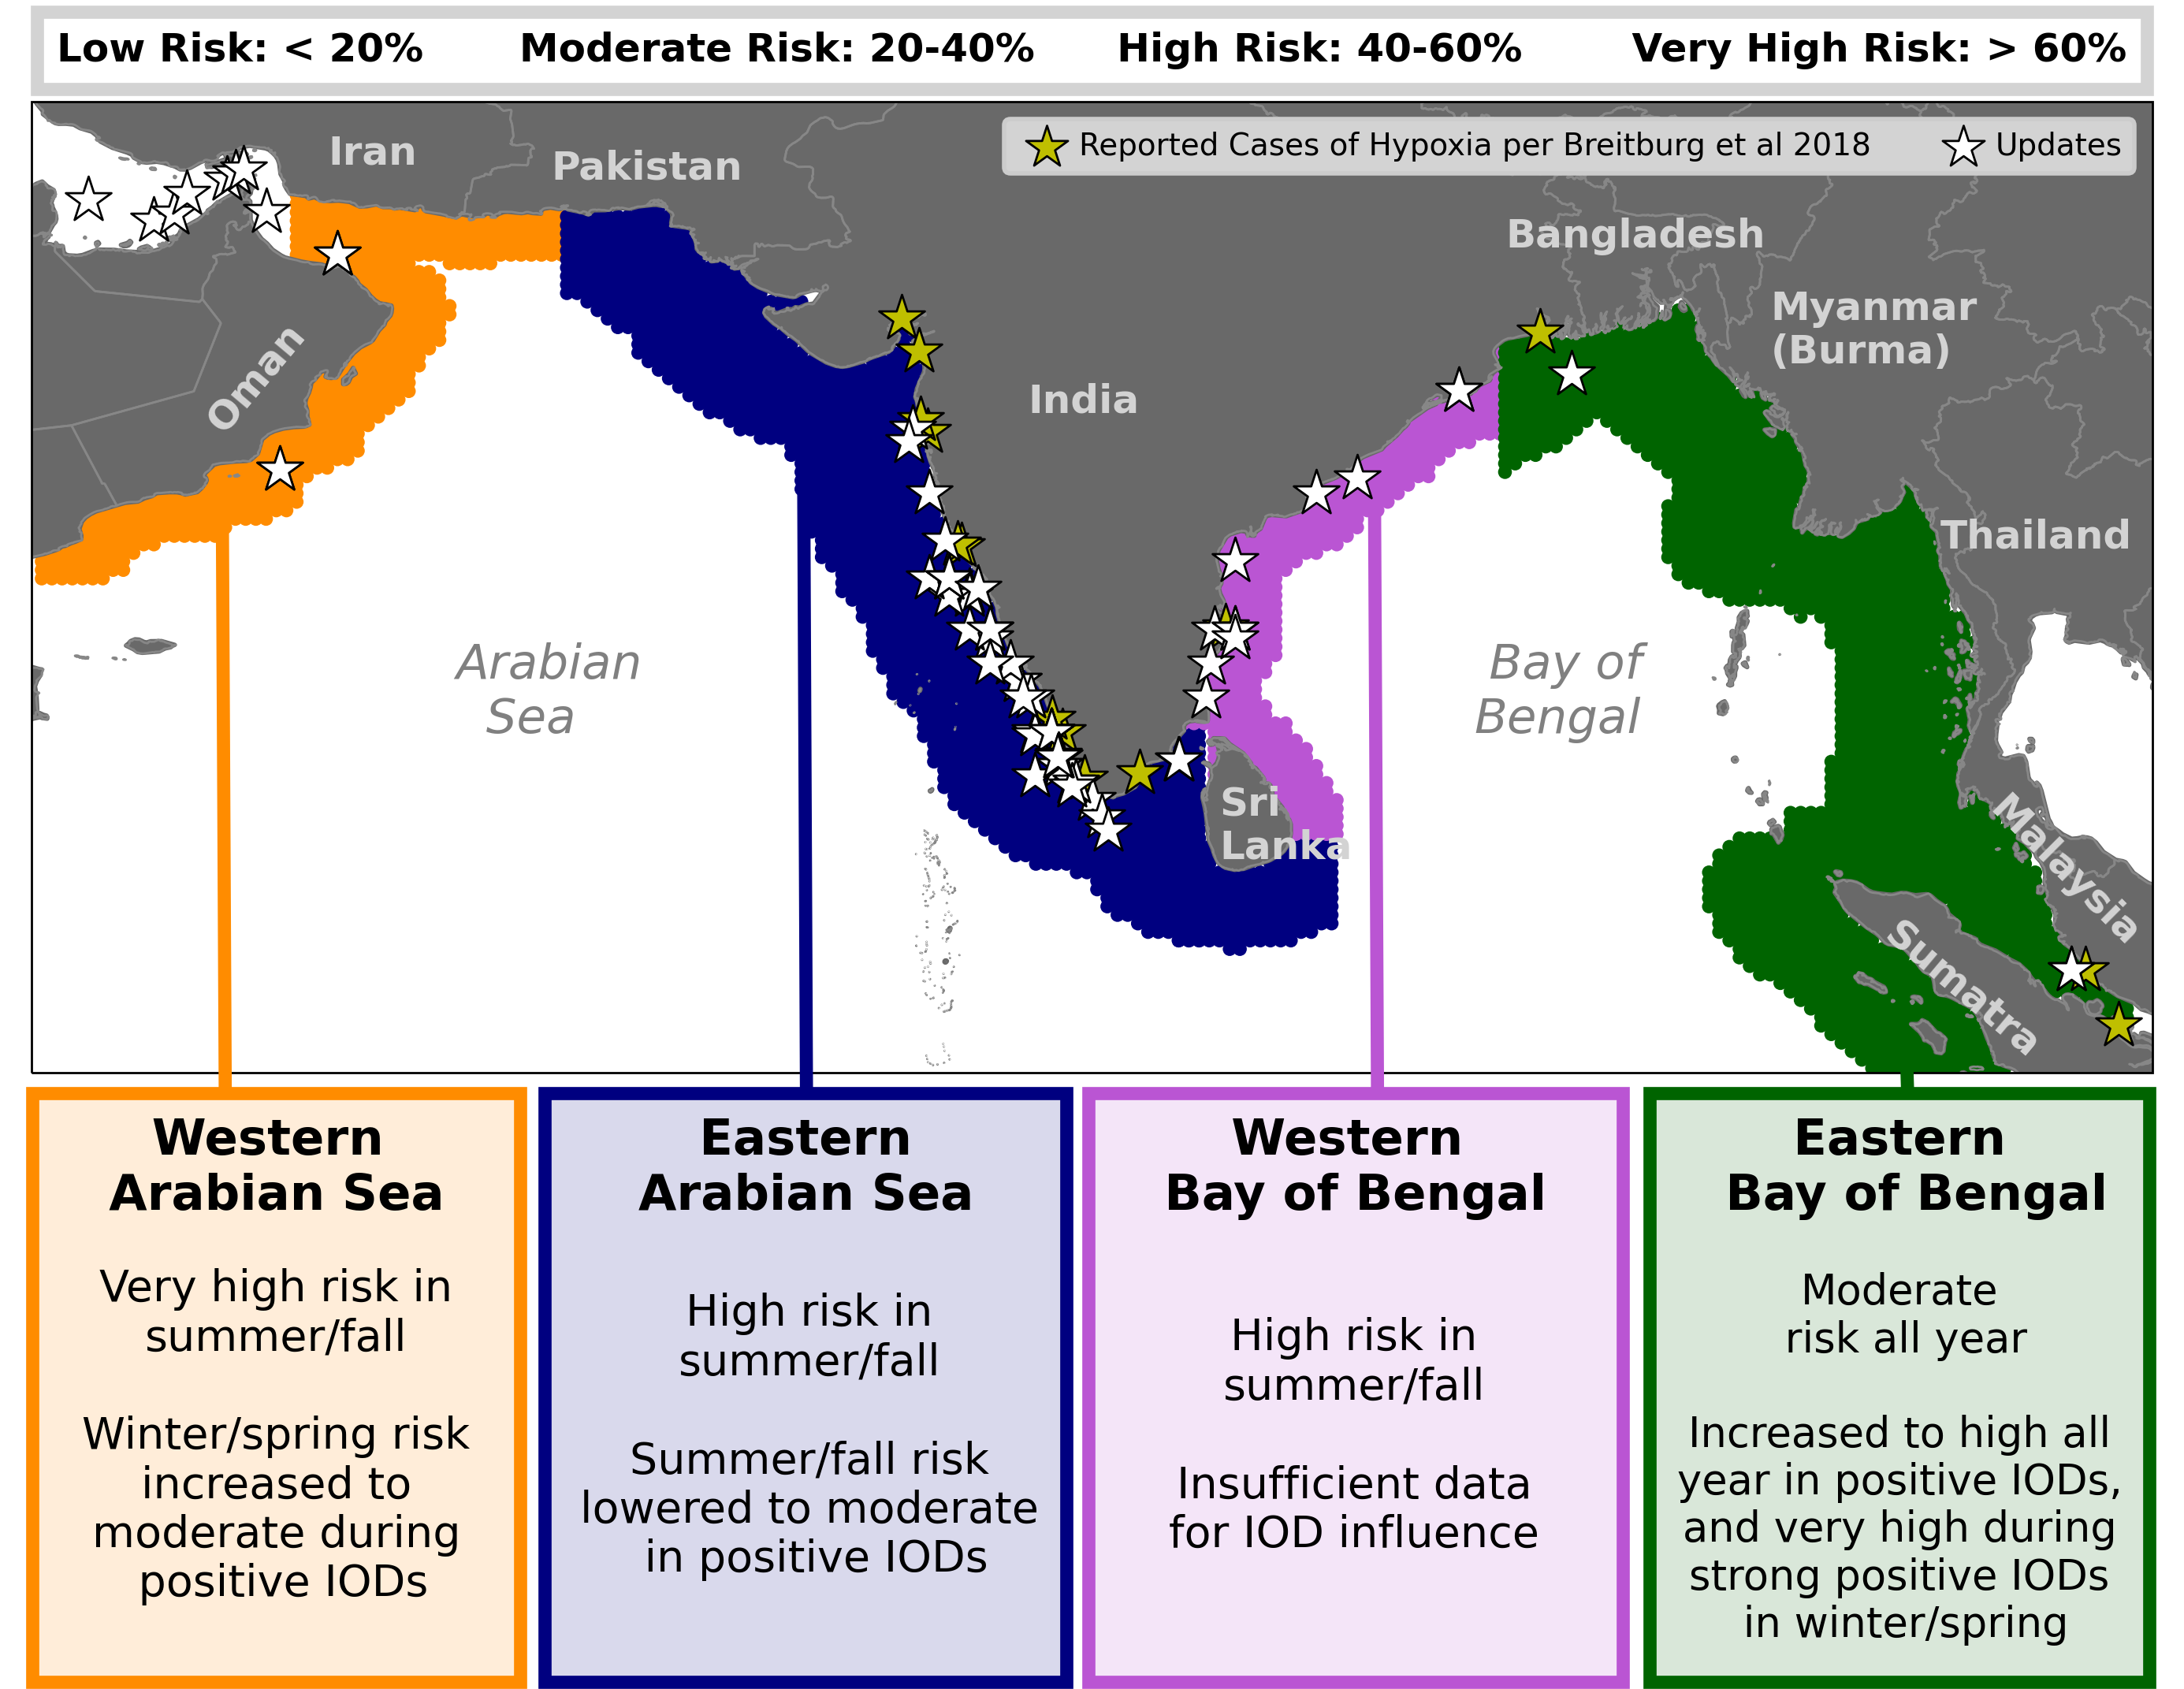

In [8]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 7,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6,
         'axes.linewidth':0.35}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,103,0,28.5]
cmin = 20
cmax = 160
sz = 40
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['darkorange','navy','mediumorchid','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,5.5),dpi=400)

#############################################################
#----------------- Temperature ---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.37, top = 0.93, right = 0.98, left = 0.02)
# add_bathy(ax,cbounds)

# wAS

p = ax.scatter(xx_wAS,yy_wAS,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eAS

p = ax.scatter(xx_eAS,yy_eAS,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# wBoB
p = ax.scatter(xx_wBoB,yy_wBoB,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eBoB
p = ax.scatter(xx_eBoB,yy_eBoB,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False)
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])


# ax.set_title('Risk of Hypoxia')

####### Hypoxia ##############################################

ind = ds_HE.etype == 1
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=120,marker = '*',c='y',
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

ax.scatter(newlon,newlat,s=120,marker = '*',c='w',
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 

# ####### Countries ##############################################
clr = 'lightgray'
csz = 9
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.85, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.245,y=0.92, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = csz, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Myanmar\n(Burma)', x = 0.82,y=0.73, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.54, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.13, fontsize = csz, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.87,y=0.015, fontsize = csz, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.22, fontsize = csz, color = clr, weight = 'bold')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.68,y=0.35, fontsize = 11, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.35, fontsize = 11, color = 'gray', style='italic')

# ####### Boxes ##############################################
tsz = 11.25
sz = 10
lw = 3
alpha = 0.15
clrs = [[255/255,140/255,0,alpha],[0,0,128/255,alpha],[186/255,85/255,211/255,alpha],[0,100/255,0,alpha]]
eclrs = ['darkorange','navy','mediumorchid','darkgreen']

y = -9.25
ax.text(57, y, " Western  \n   Arabian Sea   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[0], 
              ec=eclrs[0], lw=lw))

ax.text(57, y, "\n\n\nVery high risk in\nsummer/fall\n\nWinter/spring risk\nincreased to\nmoderate during\n positive IODs\n",
        ha="center", va="center", size=sz)

ax.text(69.98, y, "   Eastern   \n    Arabian Sea    \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[1], 
              ec=eclrs[1], lw=lw))

ax.text(70.07, y, "\n\nHigh risk in\nsummer/fall\n\nSummer/fall risk\nlowered to moderate\n in positive IODs",
        ha="center", va="center", size=sz)

ax.text(83.465, y, "   Western    \n   Bay of Bengal   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[2], 
              ec=eclrs[2], lw=lw))

ax.text(83.425, y, "\n\n\nHigh risk in\nsummer/fall\n\nInsufficient data\nfor IOD influence\n",
        ha="center", va="center", size=sz)
 
ax.text(96.8,y, "   Eastern   \n   Bay of Bengal \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[3], 
              ec=eclrs[3], lw=lw))

# ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nRisk increased to\n(very) high in\n(strong) positive\nIOD phases\n",
#         ha="center", va="center", size=sz)

ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nIncreased to high all\nyear in positive IODs,\nand very high during\nstrong positive IODs\n in winter/spring",
        ha="center", va="center", size=sz-.5)

ax.text(77.0,30, "Low Risk: < 20%       Moderate Risk: 20-40%      High Risk: 40-60%        Very High Risk: > 60%",
        ha="center", va="center", size=9,weight = 'bold',
       bbox=dict(boxstyle="square,pad=0.5", fc='w', 
              ec='lightgray', lw=lw))
y = -.7
plt.annotate(' ', (55.75,y),(55.5,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[0]))

plt.annotate(' ', (70,y),(69.75,20),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[1]))

plt.annotate(' ', (84,y),(83.75,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[2]))

plt.annotate(' ', (97,y),(96.75,2),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[3]))

###### Legend #######

ax.scatter(np.nan,np.nan,s=5,marker = '*',c='y',
                       edgecolor = 'k', label = 'Reported Cases of Hypoxia per Breitburg et al 2018'
           ,linewidth=0.5)
          
ax.scatter(np.nan,np.nan,s=5,marker = '*',c='w',
                       edgecolor = 'k', label = 'Updates'
           ,linewidth=0.5)
    
    
l = ax.legend(loc='lower center', bbox_to_anchor=(.725, .91),ncol = 2,
              markerscale = 4.5,facecolor = 'lightgray',framealpha=1,handletextpad=0.05);

plt.savefig(figpath + 'risk.pdf', format='pdf', dpi = 400)



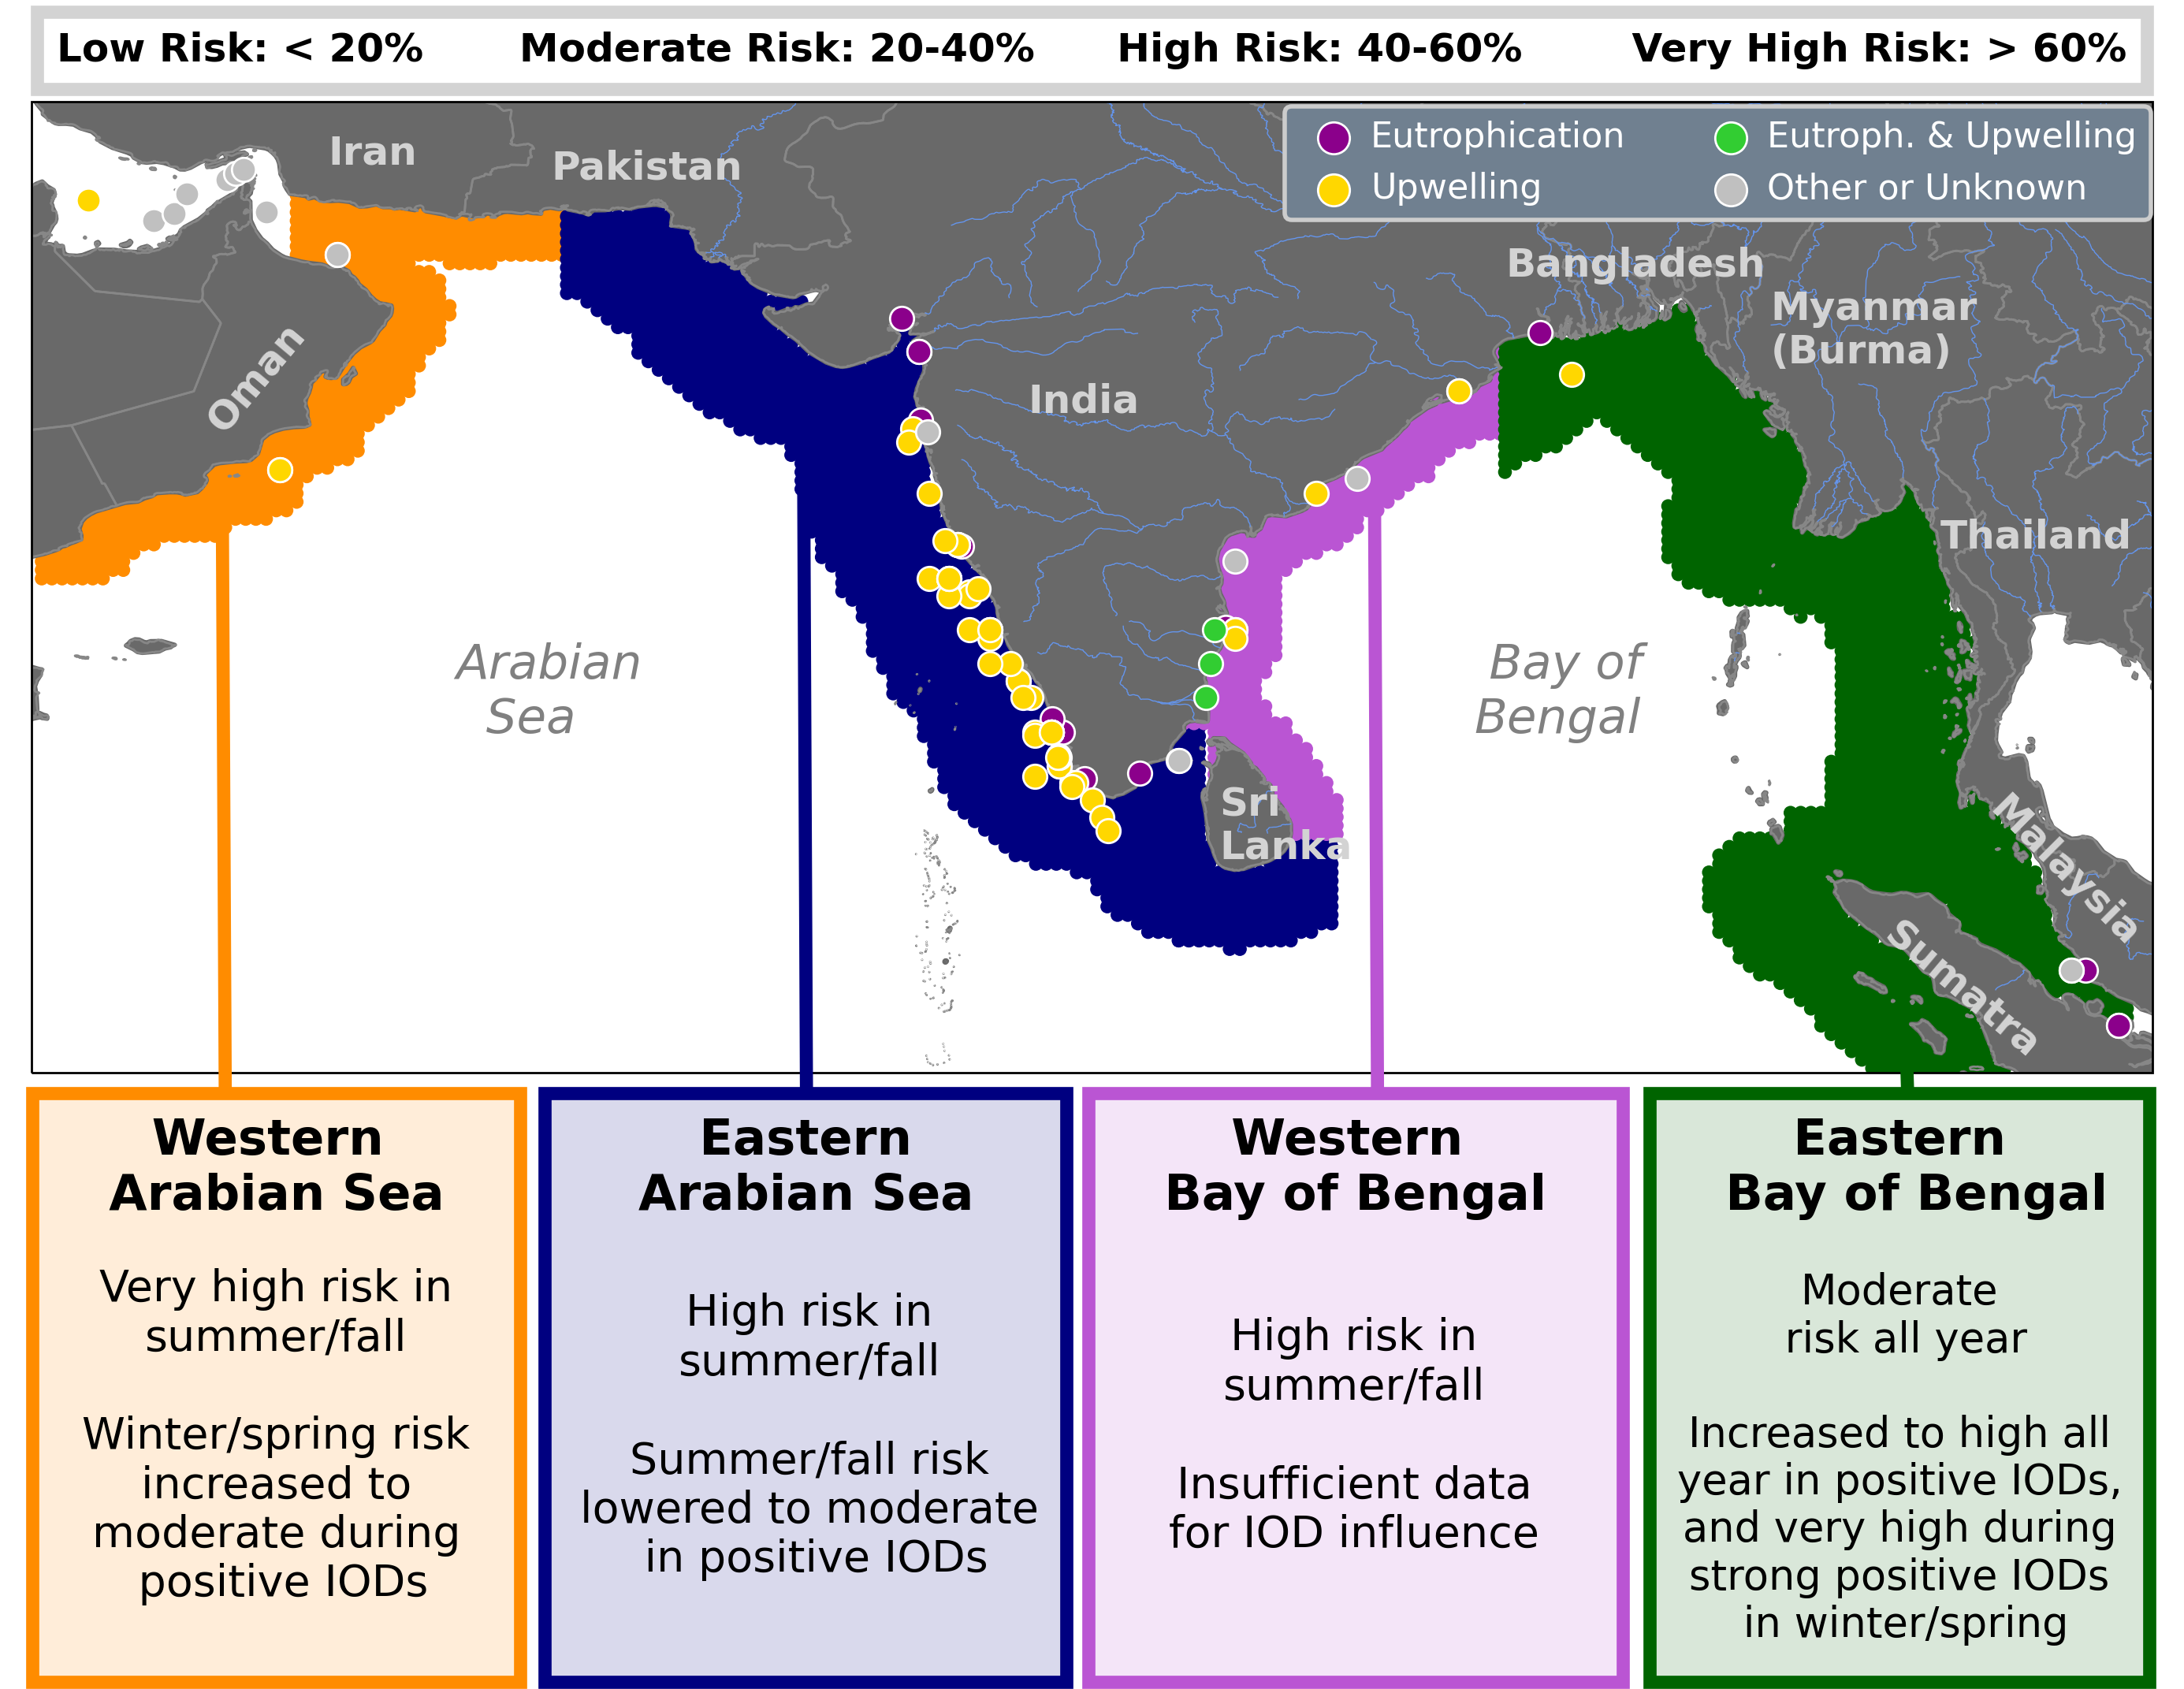

In [41]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 8,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6,
         'axes.linewidth':0.35}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,103,0,28.5]
cmin = 20
cmax = 160
sz = 40
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['darkorange','navy','mediumorchid','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,5.5),dpi=400)

#############################################################
#----------------- Temperature ---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.37, top = 0.93, right = 0.98, left = 0.02)
# add_bathy(ax,cbounds)

# wAS

p = ax.scatter(xx_wAS,yy_wAS,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eAS

p = ax.scatter(xx_eAS,yy_eAS,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# wBoB
p = ax.scatter(xx_wBoB,yy_wBoB,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eBoB
p = ax.scatter(xx_eBoB,yy_eBoB,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = True, rcolor = 'cornflowerblue')
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])


# ax.set_title('Risk of Hypoxia')

####### Hypoxia ##############################################

# ind = ds_HE.etype == 1
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=120,marker = '*',c='y',
#            edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

# ax.scatter(newlon,newlat,s=120,marker = '*',c='w',
#            edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 
lat = np.array([21.7132,9.978947,13.06666667,18.793291,8.617,10.3945,19.15,15.442295,22.13333333,21.166667,21.166667,
       8.794463,15.5,15.5,15.5,1.383333333,1.383333333,3.005775,25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,
       11.5,10,8,11,12,13,13,13,20,20,17,12.75,20.5,3,3,24,24,17.45,25,25.2,25.8,26.2,26.4,26.5,25.25,9.15,
       9.15,15,10,10,11.5,10,7.5,8.5,9,10,11,12,12.75,14,9,8.5,7.1,8.4,8.7,9.9,11,12,13,14,14.5,10,14.5,14.5,
       14.5,10,14.2,13,18.5,9.26,9.29,9.26,9.26])

lon = np.array([87.980892,76.266489,80.28333333,72.974468,76.823,76.021583,72.8,73.794522,72.33333333,72.758333,
       72.758333,78.161297,73.7,73.7,73.7,102.1666667,102.1666667,101.348089,52.4,57.08,57.08,74.5,76,72.6,
       73,73.4,74,74.5,75.2,76,77,79.8,79.9,80,80.5,80.5,86,86,82.5,80.5,88.75,101,101,58.5,58.5,83.5,54,
       54.5,54.8,55.8,56,56.2,56.75,79.125,79.135,80.5,76,76,75.2,75.6,77.25,76.5,76.2,76,75.5,75,74.5,74,
       76.2,76.6,77.4,76.5,75.6,75.6,75.3,74.5,74,73.5,73,76,73.5,73.5,73.5,76,74.2,74.5,72.5,76.17,76.17,
       76.19,76.16])
code = np.array([0,0,0,3,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0.5,0.5,1,1,1,1,1,1,1,3,3,3,3,
        3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

# eutrophic
euclrs = ['darkmagenta','gold','limegreen','silver']
ind = code == 0
ax.scatter(lon[ind],lat[ind],s=120,marker = '.',c=euclrs[0],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# upwelling
ind = code == 1
ax.scatter(lon[ind],lat[ind],s=120,marker = '.',c=euclrs[1],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# mix 0 and 1
ind = code == 0.5
ax.scatter(lon[ind],lat[ind],s=120,marker = '.',c=euclrs[2],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# other
ind = code == 3
ax.scatter(lon[ind],lat[ind],s=120,marker = '.',c=euclrs[3],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)
 
# ####### Countries ##############################################
clr = 'lightgray'
csz = 9
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.82, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.245,y=0.92, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = csz, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Myanmar\n(Burma)', x = 0.82,y=0.73, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.54, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.13, fontsize = csz, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.87,y=0.015, fontsize = csz, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.22, fontsize = csz, color = clr, weight = 'bold')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.68,y=0.35, fontsize = 11, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.35, fontsize = 11, color = 'gray', style='italic')

# ####### Boxes ##############################################
tsz = 11.25
sz = 10
lw = 3
alpha = 0.15
clrs = [[255/255,140/255,0,alpha],[0,0,128/255,alpha],[186/255,85/255,211/255,alpha],[0,100/255,0,alpha]]
eclrs = ['darkorange','navy','mediumorchid','darkgreen']

y = -9.25
ax.text(57, y, " Western  \n   Arabian Sea   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[0], 
              ec=eclrs[0], lw=lw))

ax.text(57, y, "\n\n\nVery high risk in\nsummer/fall\n\nWinter/spring risk\nincreased to\nmoderate during\n positive IODs\n",
        ha="center", va="center", size=sz)

ax.text(69.98, y, "   Eastern   \n    Arabian Sea    \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[1], 
              ec=eclrs[1], lw=lw))

ax.text(70.07, y, "\n\nHigh risk in\nsummer/fall\n\nSummer/fall risk\nlowered to moderate\n in positive IODs",
        ha="center", va="center", size=sz)

ax.text(83.465, y, "   Western    \n   Bay of Bengal   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[2], 
              ec=eclrs[2], lw=lw))

ax.text(83.425, y, "\n\n\nHigh risk in\nsummer/fall\n\nInsufficient data\nfor IOD influence\n",
        ha="center", va="center", size=sz)
 
ax.text(96.8,y, "   Eastern   \n   Bay of Bengal \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[3], 
              ec=eclrs[3], lw=lw))

# ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nRisk increased to\n(very) high in\n(strong) positive\nIOD phases\n",
#         ha="center", va="center", size=sz)

ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nIncreased to high all\nyear in positive IODs,\nand very high during\nstrong positive IODs\n in winter/spring",
        ha="center", va="center", size=sz-.5)

ax.text(77.0,30, "Low Risk: < 20%       Moderate Risk: 20-40%      High Risk: 40-60%        Very High Risk: > 60%",
        ha="center", va="center", size=9,weight = 'bold',
       bbox=dict(boxstyle="square,pad=0.5", fc='w', 
              ec='lightgray', lw=lw))
y = -.7
plt.annotate(' ', (55.75,y),(55.5,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[0]))

plt.annotate(' ', (70,y),(69.75,20),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[1]))

plt.annotate(' ', (84,y),(83.75,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[2]))

plt.annotate(' ', (97,y),(96.75,2),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[3]))

###### Legend #######

ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[0],lw = 0.5,
                       edgecolor = 'w', label = 'Eutrophication')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[1],lw = 0.5,
                       edgecolor = 'w', label = 'Upwelling')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[2],lw = 0.5,
                       edgecolor = 'w', label = 'Eutroph. & Upwelling')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[3],lw = 0.5,
                       edgecolor = 'w', label = 'Other or Unknown')
    
    
l = ax.legend(loc='lower center', bbox_to_anchor=(.795, .86),ncol = 2,
              markerscale = 6.5,facecolor = 'slategray',framealpha=1,handletextpad=0.05);
for text in l.get_texts():
    text.set_color("w")
plt.savefig(figpath + 'risk.pdf', format='pdf', dpi = 400)




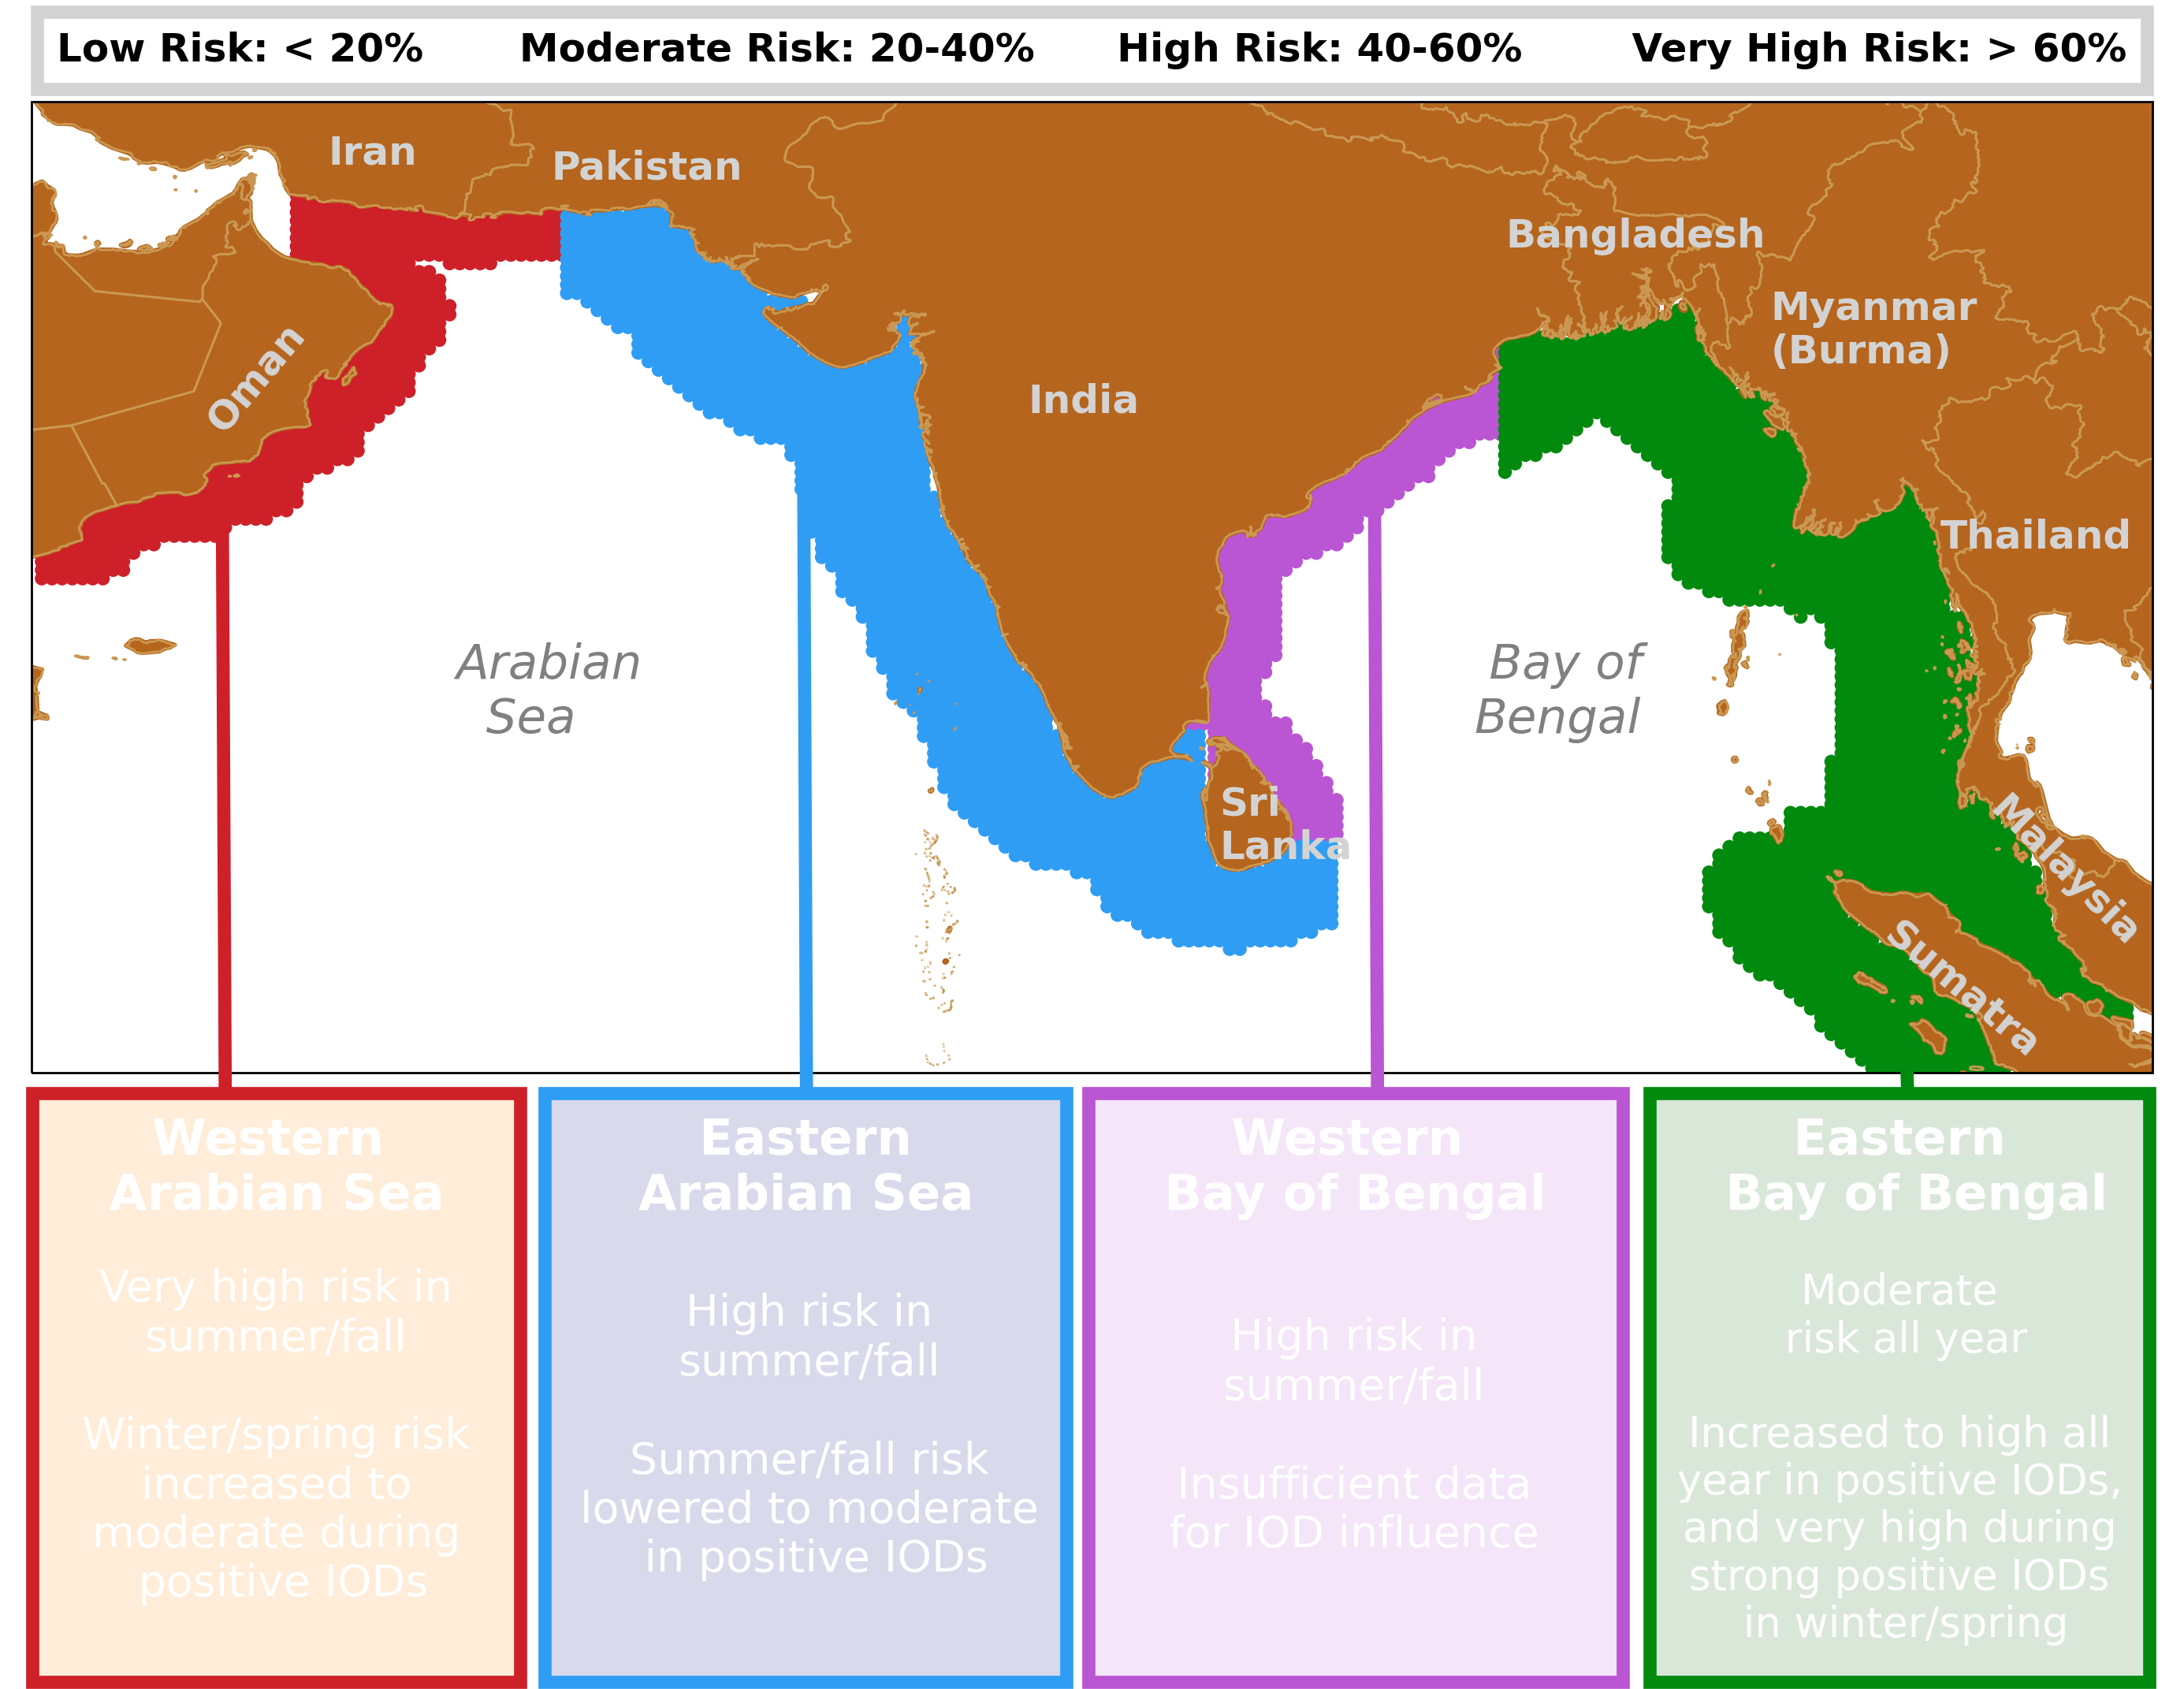

In [10]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 7,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6,
         'axes.linewidth':0.35}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,103,0,28.5]
cmin = 20
cmax = 160
sz = 40
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['#ce2029','#2f9df4','mediumorchid','#028a0f']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,5.5),dpi=400)

#############################################################
#----------------- Temperature ---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.37, top = 0.93, right = 0.98, left = 0.02)
# add_bathy(ax,cbounds)

# wAS

p = ax.scatter(xx_wAS,yy_wAS,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eAS

p = ax.scatter(xx_eAS,yy_eAS,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# wBoB
p = ax.scatter(xx_wBoB,yy_wBoB,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eBoB
p = ax.scatter(xx_eBoB,yy_eBoB,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])


# ax.set_title('Risk of Hypoxia')

####### Hypoxia ##############################################

# newlat = [25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,11.5,10,8,11,12,13]
# newlon = [52.4,57.08,57.08,74.5,76,72.6,73,73.4,74,74.5,75.2,76,77,79.5,79.8,80]

# ind = ds_HE.etype == 1
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=120,marker = '*',c='y',
#            edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

# ax.scatter(newlon,newlat,s=120,marker = '*',c='w',
#            edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 
[ax.spines[x].set_color('w') for x in ["bottom","top","left","right"]]
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
    
# ####### Countries ##############################################
clr = 'lightgray'
csz = 9
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.85, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.245,y=0.92, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = csz, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Myanmar\n(Burma)', x = 0.82,y=0.73, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.54, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.13, fontsize = csz, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.87,y=0.015, fontsize = csz, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.22, fontsize = csz, color = clr, weight = 'bold')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.68,y=0.35, fontsize = 11, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.35, fontsize = 11, color = 'gray', style='italic')

# ####### Boxes ##############################################
tsz = 11.25
sz = 10
lw = 3
alpha = 0.15
eclrs = clrs
clrs = [[255/255,140/255,0,alpha],[0,0,128/255,alpha],[186/255,85/255,211/255,alpha],[0,100/255,0,alpha]]

y = -9.25
ax.text(57, y, " Western  \n   Arabian Sea   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',color = 'w',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[0], 
              ec=eclrs[0], lw=lw))

ax.text(57, y, "\n\n\nVery high risk in\nsummer/fall\n\nWinter/spring risk\nincreased to\nmoderate during\n positive IODs\n",
        ha="center", va="center",color = 'w', size=sz)

ax.text(69.98, y, "   Eastern   \n    Arabian Sea    \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',color = 'w',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[1], 
              ec=eclrs[1], lw=lw))

ax.text(70.07, y, "\n\nHigh risk in\nsummer/fall\n\nSummer/fall risk\nlowered to moderate\n in positive IODs",
        ha="center", va="center",color = 'w', size=sz)

ax.text(83.465, y, "   Western    \n   Bay of Bengal   \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',color = 'w',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[2], 
              ec=eclrs[2], lw=lw))

ax.text(83.425, y, "\n\n\nHigh risk in\nsummer/fall\n\nInsufficient data\nfor IOD influence\n",
        ha="center", va="center",color = 'w', size=sz)
 
ax.text(96.8,y, "   Eastern   \n   Bay of Bengal \n\n\n\n\n\n\n\n",
        ha="center", va="center", size=tsz,weight = 'bold',color = 'w',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[3], 
              ec=eclrs[3], lw=lw))

# ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nRisk increased to\n(very) high in\n(strong) positive\nIOD phases\n",
#         ha="center", va="center", size=sz)

ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nIncreased to high all\nyear in positive IODs,\nand very high during\nstrong positive IODs\n in winter/spring",
        ha="center", va="center",color = 'w', size=sz-.5)

ax.text(77.0,30, "Low Risk: < 20%       Moderate Risk: 20-40%      High Risk: 40-60%        Very High Risk: > 60%",
        ha="center", va="center", size=9,weight = 'bold',
       bbox=dict(boxstyle="square,pad=0.5", fc='w', 
              ec='lightgray', lw=lw))
y = -.7
plt.annotate(' ', (55.75,y),(55.5,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[0]))

plt.annotate(' ', (70,y),(69.75,20),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[1]))

plt.annotate(' ', (84,y),(83.75,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[2]))

plt.annotate(' ', (97,y),(96.75,2),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[3]))

###### Legend #######

ax.scatter(np.nan,np.nan,s=5,marker = '*',c='y',
                       edgecolor = 'k', label = 'Reported Cases of Hypoxia per Breitburg et al 2018'
           ,linewidth=0.5)
          
ax.scatter(np.nan,np.nan,s=5,marker = '*',c='w',
                       edgecolor = 'k', label = 'Updates'
           ,linewidth=0.5)
    
    
# l = ax.legend(loc='lower center', bbox_to_anchor=(.725, .91),ncol = 2,
#               markerscale = 4.5,facecolor = 'lightgray',framealpha=1,handletextpad=0.05);

# plt.savefig(figpath + 'risk.pdf', format='pdf', dpi = 400)

